In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plt.style.use("fivethirtyeight")

### dataset imports

In [2]:
#from sklearn import svm, datasets      #this imports the datasets in scikit learn

In [3]:
#iris_df = sns.load_dataset('iris') # we will use the sklearn import instead

In [4]:
titanic_df = sns.load_dataset('titanic')

In [5]:
flights_df = sns.load_dataset('flights')

In [6]:
exercise_df = sns.load_dataset('exercise')

In [7]:
planets_df = sns.load_dataset('planets')

In [8]:
tips_df = sns.load_dataset('tips')

In [9]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
tips_df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### create dummy variables

In [11]:
new_df = pd.get_dummies(tips_df, drop_first=True)

In [12]:
new_df

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
5,25.29,4.71,4,0,1,0,0,1,1
6,8.77,2.00,2,0,1,0,0,1,1
7,26.88,3.12,4,0,1,0,0,1,1
8,15.04,1.96,2,0,1,0,0,1,1
9,14.78,3.23,2,0,1,0,0,1,1


### define X and y

In [13]:
feature_cols = new_df.drop('tip', axis=1).copy()
X = feature_cols
y = new_df['tip']

### train test split (TTS)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## modelling

- create the model
- cross val score (note, this can be performed for all models, though we only show it for LR below)
- grid search cv (notes this can be performed for all models, though we only show it for LR below)

### linear regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression() #instantiates the model
lr.fit(X_train, y_train) #fits the model on the training data
preds = lr.predict(X_test) #predicts the y's

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
y_true = y_test
y_pred = preds
mean_squared_error(y_true, y_pred) #the smaller the MSE the better 

0.6890309616058945

In [20]:
lr.score(X_test, y_test) #this gives R^2 or model fit (the larger the better)

0.5511624915954616

In [21]:
print(lr.coef_)
lr.intercept_

[ 0.09667103  0.14131889  0.03930682  0.10850848  0.31922333  0.17099423
  0.32831038 -0.19875873]


0.6472364258424155

### cross val score (CVS)

In [22]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [23]:
X = X_train
y = y_train
print(cross_val_score(lr, X, y, cv=10))

#this gives the score(R^2) for the kfold where cv=10
#take the avg of the cross val scores and this will tell you how well you will do

[ 0.12690721 -0.92086106  0.03993537 -0.0775587   0.58453456  0.34815394
  0.41250442  0.35750448  0.3591318   0.41127163]


#### CVS with K fold

In [24]:
kf = KFold(n_splits=10, shuffle=True)

X = X_train
y = y_train
print(cross_val_score(lr, X, y, cv=kf))

#this gives the score(R^2) for the kfold where cv=the kfold
#take the avg of the cross val scores and this will tell you how well you will do

[-0.29119594  0.41889576  0.46990315  0.01570399  0.43328078  0.37607323
 -0.00918777  0.23875401  0.45578296  0.4546136 ]


### grid search cv (GSCV)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
params = {'fit_intercept': (True, False), 'normalize': (True, False)}

In [27]:
gscv = GridSearchCV(lr, params) #instantiates the grid search

In [28]:
gscv.fit(X_train, y_train) #fits and cycles through model and the params that we passed in

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': (True, False), 'normalize': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
gscv.best_estimator_ #this gives the best model paramaters for an optimal outcome or best model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

In [30]:
lr = gscv.best_estimator_ #instantiates the best model
lr.fit(X_train, y_train) #fits the model on the training data
preds = lr.predict(X_test) #predicts the y's

In [31]:
y_true = y_test
y_pred = preds
mean_squared_error(y_true, y_pred) #the smaller the MSE the better 

0.7092697238807557

In [32]:
lr.score(X_test, y_test) #this gives R^2 or model fit (the larger the better)

0.5379788813677457

In [33]:
print(lr.coef_) 
lr.intercept_

#normalize=True is like a z-score, which subtracts the mean from every data point and divides it by the variance

#intercept=False means that there is no required intercept (does this mean it's zero?)

[ 0.1032484   0.22040584  0.17055563  0.26150436  0.60591737  0.34261615
  0.45644155 -0.18640916]


0.0

### Logistic Reression

In [34]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
new_df2 = pd.get_dummies(titanic_df, drop_first=True)

In [36]:
new_df2

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,38.0,1,0,71.2833,False,False,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,1,35.0,1,0,53.1000,False,False,0,0,...,1,0,1,0,0,0,0,0,1,1
4,0,3,35.0,0,0,8.0500,True,True,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0,3,NaN,0,0,8.4583,True,True,1,1,...,0,0,0,0,0,0,0,1,0,0
6,0,1,54.0,0,0,51.8625,True,True,1,0,...,0,0,0,0,1,0,0,0,1,0
7,0,3,2.0,3,1,21.0750,False,False,1,0,...,0,0,0,0,0,0,0,0,1,0
8,1,3,27.0,0,2,11.1333,False,False,0,0,...,1,0,0,0,0,0,0,0,1,1
9,1,2,14.0,1,0,30.0708,False,False,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
new_df2 = new_df2[['survived', 'age', 'adult_male']].dropna().copy()

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lgr = LogisticRegression() #instantiates

feature_cols = new_df2[['age', 'adult_male']].copy()
X = feature_cols
y = new_df2['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #TTS

lgr.fit(X_train, y_train) #fits
preds = lgr.predict(X_test) # predicts

#### stratified K fold

In [40]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)

X = X_train
y = y_train
print(cross_val_score(lr, X, y, cv=skf))

#stratified splits the categorical variables or values evenly, across the n_splits, so as to avoid imbalance
#this gives the score(R2) for the kfold where cv=the startifiedkfold
#take the avg of the cross val scores and this will tell you how well you will do

[ 0.05926271  0.11579134 -0.07818107 -0.06682441 -0.07146431 -0.01806188
  0.15957979  0.02983926 -0.06829708 -0.00701393]


# munur   #ask munur what auc is...?

In [41]:
from sklearn.metrics import roc_auc_score

params = {'fit_intercept': (True, False)}
grid_clf_auc = GridSearchCV(lgr, param_grid = params, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))

#ask munur what auc is...???

Test set AUC:  0.7793517763109099


In [42]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

from sklearn.metrics import classification_report
pp.pprint(classification_report(y_test, preds))

#precision:
#recall:
#f1-score:
#support\n:    

('             precision    recall  f1-score   support\n'
 '\n'
 '          0       0.81      0.81      0.81       139\n'
 '          1       0.73      0.73      0.73        97\n'
 '\n'
 'avg / total       0.78      0.78      0.78       236\n')


## clustering

### K nearest neighbors (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
from sklearn import datasets
iris_df = datasets.load_iris()

In [45]:
X = iris_df.data
y = iris_df.target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #TTS

In [47]:
knn = KNeighborsClassifier(n_neighbors=8) #instantiates

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [49]:
knn.predict(X_test)

array([0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 0,
       0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 0, 0, 1, 0, 1])

In [50]:
knn.score(X_test, y_test) #this gives you accuracy

0.92

### K means (KM)

In [51]:
#dataset needs to be categorical - such as iris

In [52]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, preprocessing, metrics

In [53]:
X = iris_df.data
y = iris_df.target

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #TTS

In [55]:
k = 2   #set the number of clusters
kmeans = cluster.KMeans(n_clusters=k, n_init=10) #n_init is the number of iterartions 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [56]:
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [57]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [58]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [59]:
centroids

array([[5.00566038, 3.36037736, 1.56226415, 0.28867925],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [60]:
inertia

152.36870647733906

In [61]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.6808136202713508

## decision trees - ensemble methods

### decision tree regressor (DTR - used for continuous data)

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
flights_df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [64]:
new_df3 = pd.get_dummies(flights_df, drop_first=True)

In [65]:
new_df3.head()

,year,passengers,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December
0,1949,112,0,0,0,0,0,0,0,0,0,0,0
1,1949,118,1,0,0,0,0,0,0,0,0,0,0
2,1949,132,0,1,0,0,0,0,0,0,0,0,0
3,1949,129,0,0,1,0,0,0,0,0,0,0,0
4,1949,121,0,0,0,1,0,0,0,0,0,0,0


In [66]:
X = new_df3.drop('passengers', axis=1).copy()
y = new_df3['passengers']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #TTS

In [68]:
dtr = DecisionTreeRegressor(max_depth=5)

In [69]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [70]:
preds = dtr.predict(X_test)

In [71]:
preds

array([459.42857143, 290.63636364, 343.5       , 290.63636364,
       218.5       , 192.28571429, 122.71428571, 343.5       ,
       122.71428571, 136.8       , 226.16666667, 290.63636364,
       290.63636364, 290.63636364, 226.16666667, 290.63636364,
       290.63636364, 136.8       , 343.5       , 164.25      ,
       164.25      , 343.5       , 226.16666667, 192.28571429,
       397.16666667, 226.16666667, 136.8       , 136.8       ,
       343.5       , 192.28571429, 397.16666667, 290.63636364,
       465.        , 459.42857143, 459.42857143, 136.8       ,
       218.5       , 122.71428571, 343.5       , 218.5       ,
       290.63636364, 397.16666667, 397.16666667, 218.5       ,
       136.8       , 192.28571429, 218.5       , 122.71428571])

In [72]:
dtr.score(X_test, y_test) #this gives R2

0.8451588951084121

In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
y_true = y_test
y_pred = preds
mean_squared_error(y_true, y_pred) #the smaller the MSE the better

1918.151176973429

In [75]:
pd.DataFrame({'feature':X.columns, 'importance':dtr.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,year,0.908727
6,month_July,0.045921
7,month_August,0.031378
5,month_June,0.012583
10,month_November,0.001123
8,month_September,0.000268
1,month_February,0.000000
2,month_March,0.000000
3,month_April,0.000000
4,month_May,0.000000


### decision tree classifier (DTC - used for categorical data)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
new_df4 = pd.get_dummies(exercise_df, drop_first=True)

In [78]:
new_df4.head()

,Unnamed: 0,id,pulse,diet_low fat,time_15 min,time_30 min,kind_walking,kind_running
0,0,1,85,1,0,0,0,0
1,1,1,85,1,1,0,0,0
2,2,1,88,1,0,1,0,0
3,3,2,90,1,0,0,0,0
4,4,2,92,1,1,0,0,0


In [79]:
X = new_df4.drop(['Unnamed: 0', 'id', 'diet_low fat'], axis=1).copy()
y = new_df4['diet_low fat']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #TTS

In [81]:
dtc = DecisionTreeClassifier(max_depth=5)

In [82]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
preds = dtc.predict(X_test)

In [84]:
preds

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0], dtype=uint8)

In [85]:
dtc.score(X_test, y_test) #this gives accuracy

0.5

In [86]:
pd.DataFrame({'feature':X.columns, 'importance':dtc.feature_importances_}).sort_values(by='importance' ,ascending=False)

,feature,importance
0,pulse,0.443340
2,time_30 min,0.203765
1,time_15 min,0.178523
4,kind_running,0.174372
3,kind_walking,0.000000


In [87]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

from sklearn.metrics import classification_report
pp.pprint(classification_report(y_test, preds))

#precision:
#recall:
#f1-score:
#support\n:    

('             precision    recall  f1-score   support\n'
 '\n'
 '          0       0.39      0.64      0.48        11\n'
 '          1       0.67      0.42      0.52        19\n'
 '\n'
 'avg / total       0.56      0.50      0.50        30\n')


#### data tree visual 

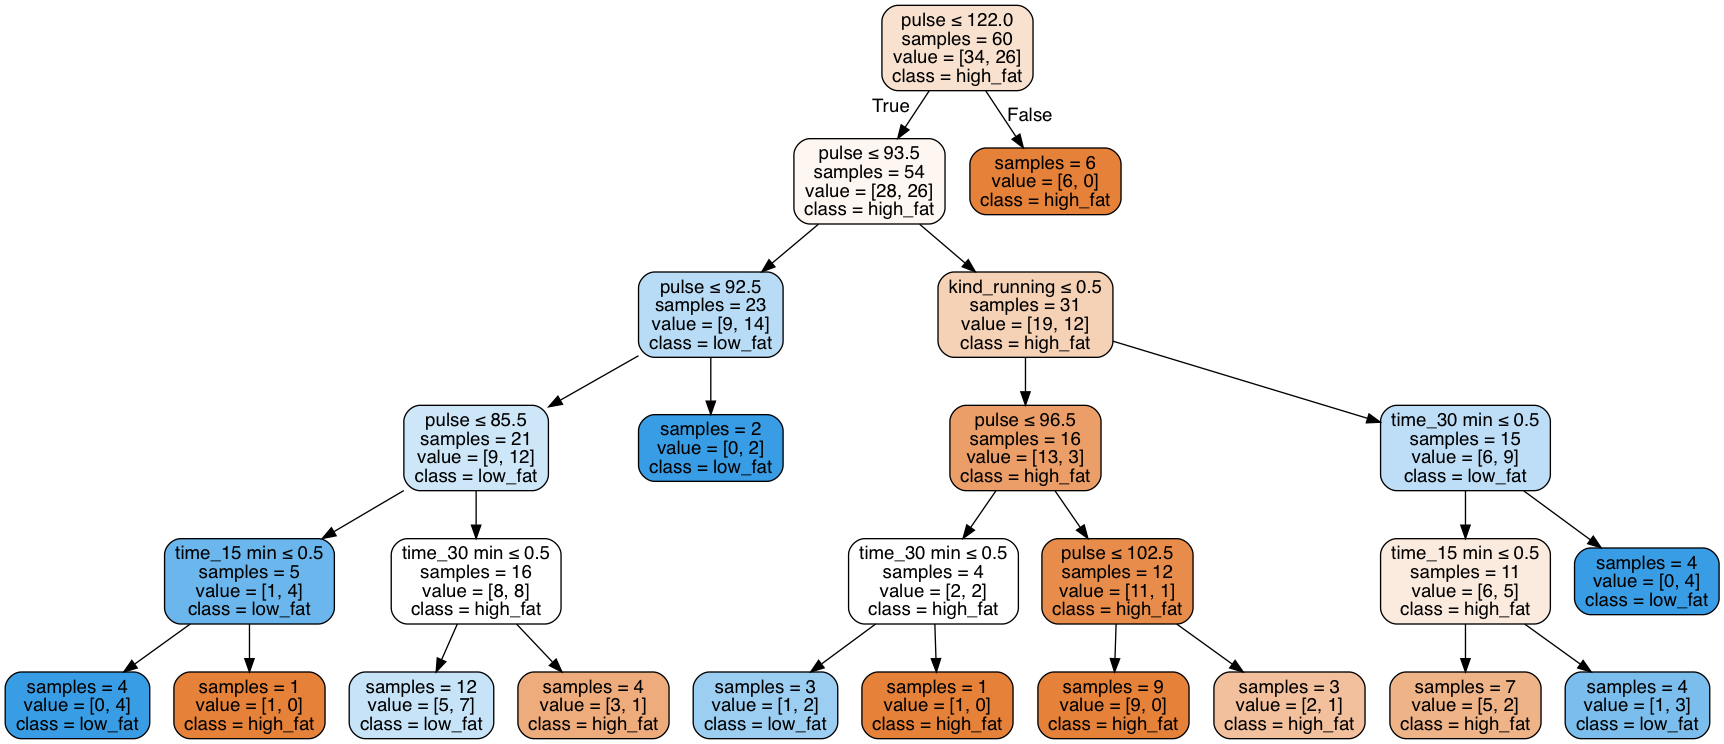

In [88]:
# Create a graphviz file of the decision tree, will need gto download pydotplus (w' conda) and graphviz (w' homebrew)
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn import tree
import pydotplus

feature_names = X.columns

dot_data = StringIO()

tree.export_graphviz(dtc, out_file=dot_data, 
                     feature_names=feature_names,
                     class_names=['high_fat', 'low_fat'],
                     filled=True, rounded=True, proportion=False,
                     impurity=False,
                     special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### random forest

### random forest (regressor for continunous data)

In [89]:
from sklearn import datasets
housing_df = datasets.load_boston()

In [90]:
h_df = pd.DataFrame(housing_df.data, columns=housing_df.feature_names)

In [91]:
h_df.describe().round(1) #this is the portion of the data with the X columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,7.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.0,391.4,11.4
75%,3.6,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0


In [92]:
h_df['y_target'] = housing_df.target

In [93]:
h_df.describe().round(1) #this is the portion of the data that has both X columns and y

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y_target
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6,11.4,11.1,0.1,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6,23.3,6.9,0.3,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,0.0,0.0,0.5,0.0,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,0.1,0.0,5.2,0.0,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,7.0,17.0
50%,0.3,0.0,9.7,0.0,0.5,6.2,77.5,3.2,5.0,330.0,19.0,391.4,11.4,21.2
75%,3.6,12.5,18.1,0.0,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,89.0,100.0,27.7,1.0,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X = housing_df.data 
y = housing_df.target #value of the house

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #TTS

rfrg = RandomForestRegressor(n_estimators=10, max_depth=2, random_state=0)
rfrg.fit(X_train, y_train)

kf = KFold(n_splits=10, shuffle=True)

print(cross_val_score(rfrg, X_train, y_train, cv=kf))

print(rfrg.feature_importances_)

[0.69162871 0.47621667 0.44785776 0.75358137 0.8850103  0.78709977
 0.89376857 0.89909544 0.74585359 0.73776283]
[0.         0.         0.         0.         0.         0.34497672
 0.         0.00069257 0.         0.         0.         0.
 0.65433071]


In [95]:
#pd.DataFrame({'feature': h_df.columns[:-1], 'importance':rfrg.feature_importances_})
pd.DataFrame({'feature': housing_df.feature_names, 'importance':rfrg.feature_importances_}).sort_values(by='importance' ,ascending=False)

,feature,importance
12,LSTAT,0.654331
5,RM,0.344977
7,DIS,0.000693
0,CRIM,0.000000
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000
8,RAD,0.000000


In [96]:
y_true = y_test
y_pred = rfrg.predict(X_test)
mean_squared_error(y_true, y_pred) #the smaller the MSE the better 

22.3775521394132

In [97]:
rfrg.score(X_test, y_test) #this gives R^2 or model fit (the larger the better)

0.7086914393623722

### random forest (classifier for categorical data)

In [98]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

X = titanic_df.drop(['survived', 'age'], axis=1).copy()
X = pd.get_dummies(X, drop_first=True)
y = titanic_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) #TTS

rfclsf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=0)
rfclsf.fit(X_train, y_train)

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)

scores = cross_val_score(rfclsf, X_train, y_train, cv=skf)

print(rfclsf.feature_importances_)

print(np.average(scores))
# print((scores))

pp.pprint(classification_report(rfclsf.predict(X), y))

[0.16094642 0.         0.0014082  0.02918072 0.08598274 0.
 0.10227141 0.         0.00130749 0.         0.02192602 0.14206411
 0.17629188 0.00189325 0.         0.         0.         0.00497517
 0.         0.         0.         0.2717526 ]
0.931271186440678
('             precision    recall  f1-score   support\n'
 '\n'
 '          0       0.98      0.92      0.95       586\n'
 '          1       0.87      0.97      0.91       305\n'
 '\n'
 'avg / total       0.94      0.94      0.94       891\n')


In [100]:
pd.DataFrame({'feature': X.columns, 'importance':rfclsf.feature_importances_}).sort_values(by='importance' ,ascending=False)

,feature,importance
21,alive_yes,0.271753
12,who_woman,0.176292
0,pclass,0.160946
11,who_man,0.142064
6,sex_male,0.102271
4,adult_male,0.085983
3,fare,0.029181
10,class_Third,0.021926
17,deck_F,0.004975
13,deck_B,0.001893


# StandardScaler and imputer - add in to above examples / place in data cleaning notebook

# NLP

# Transformers: CountVectorizer (use instead of get dummies???) add in to above examples / place in data cleaning notebook

### randomized search, like grid search but is random - add in 

### add - confusion matrix in --- print(metrics.classification_report(y_test, y_pred_class))

poisson distribution: 

https://www.google.com/search?q=puason+distribution%3A&oq=puason+distribution%3A&aqs=chrome..69i57j0l5.226j0j7&sourceid=chrome&ie=UTF-8